# Práctica 3: Decodificación de Ficheros con Okteta. Enteros, reales y caracteres

## Objetivos

El objetivo de esta primera sesión de prácticas es conseguir que el alumno se familiarice con los sistemas de codificación más usuales para representar datos en un ordenador. Haciendo uso de la herramienta de Linux denominada `okteta`, el alumno podrá examinar la codificación de distintos tipos de datos y experimentar con ciertos conceptos básicos como el desplazamiento dentro de un fichero. Esta sesión también se utilizará para reforzar conceptos que se imparten durante las clases teóricas. Para ello se solicitará también a los alumnos que creen mediante `okteta` ficheros binarios que contengan la codificación correcta de valores enteros, reales y de cadenas de caracteres.

## La herramienta okteta

Okteta es un editor bastante sencillo de archivos binarios. Los datos de los archivos se muestran en dos columnas, una con los valores numéricos de cada byte y otra con los caracteres asociados a dichos valores numéricos. El programa permite editar los valores de los bytes tanto en la columna binaria como en la de los caracteres. Además de esto, otra funcionalidad que utilizaremos a lo largo de este boletín de prácticas es la decodificación de los datos binarios atendiendo a los tipos de datos más comunes, como son los enteros de distinta longitud y los números en coma flotante.
Quizá la mejor forma de familiarizarse con la aplicación sea echando un vistazo a su interfaz, como se muestra en la siguiente imagen:

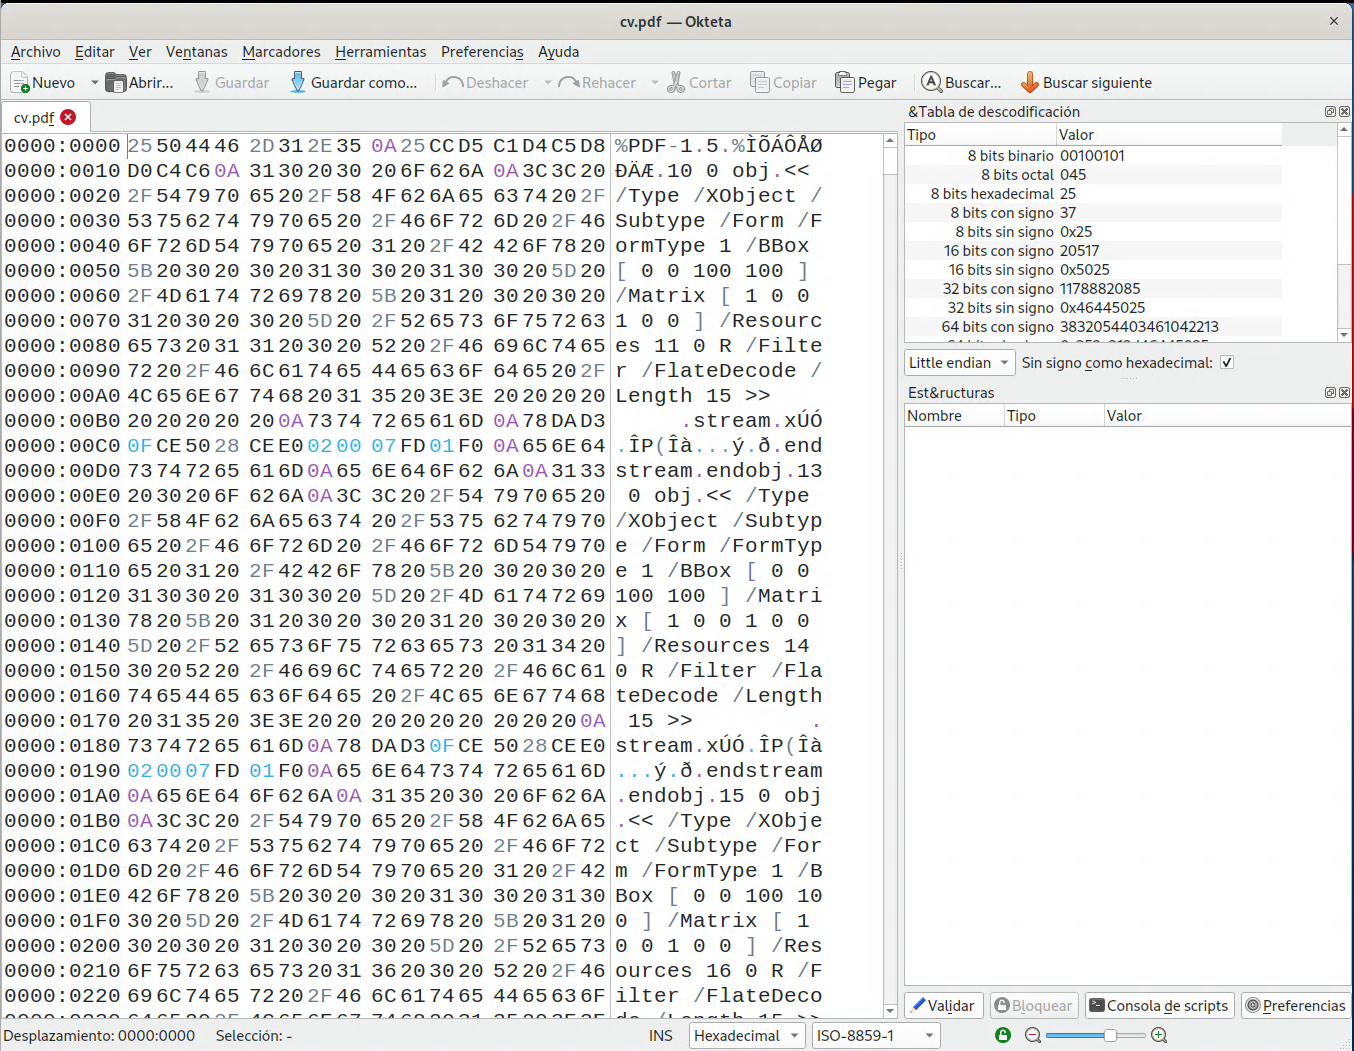


Podemos ver que una vez que se ha abierto un determinado fichero (en este caso denominado `cv.pdf`), se nos empieza a mostrar el contenido del mismo en dos columnas distintas:
- **Contenido plano**. Se nos muestra el valor de cada byte del fichero en hexadecimal. Esto nos permite conocer cuál es el valor de los bytes almacenados en el fichero sin ningún tipo de interpretación, simplemente su contenido binario.

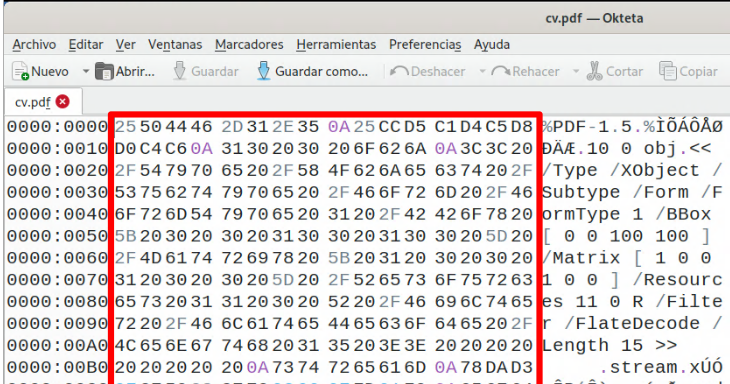


- **Interpretación de caracteres**. En esta columna se muestra cuál sería la interpretación de cada byte del fichero si se considerara que en realidad representan caracteres codificados mediante un esquema de codificación que es configurable, como se comenta al final de esta sección.
    
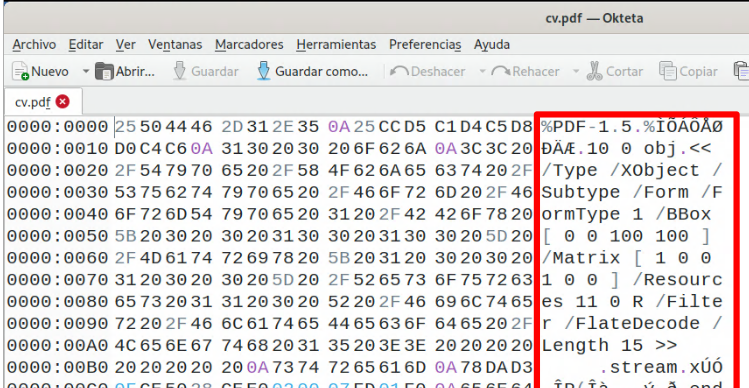

- **Desplazamiento (posición) en el fichero**. Para saber en qué posición concreta se encuetra cada byte dentro del fichero, hay una columna de desplazamiento. Los valores que ahí se muestran se corresponden con la posición dentro del fichero del primer byte de cada fila. El desplazamiento del primer byte del fichero es 0. 

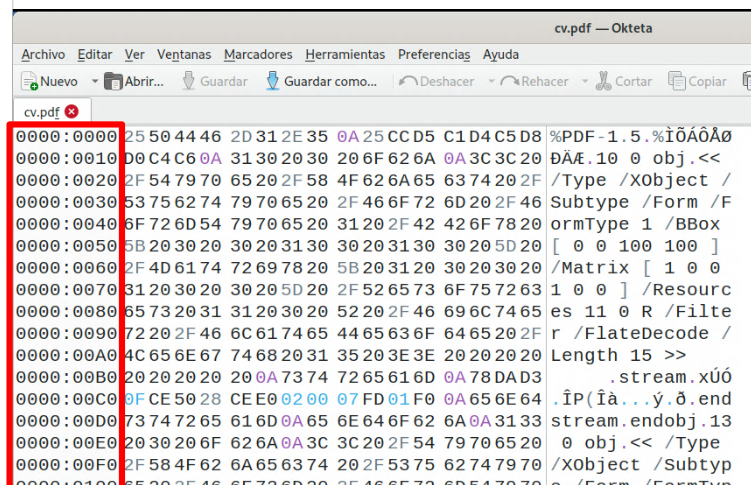


Para saber el desplazamiento exacto de un  determinado byte en el fichero basta con situar el cursor sobre el byte, puesto que se nos mostrará en la parte inferior izquierda de la ventana el desplazamiento en hexadecimal de dicho byte:

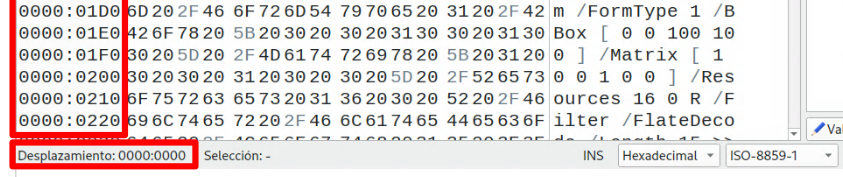

Por último, una de las zonas más importantes de la interfaz es la tabla de decodificación. Una vez situado el cursor sobre un determinado byte, okteta realiza una interpretación de dicho byte y de los bytes siguientes como si estuvieran codificando distintos tipos de datos. 

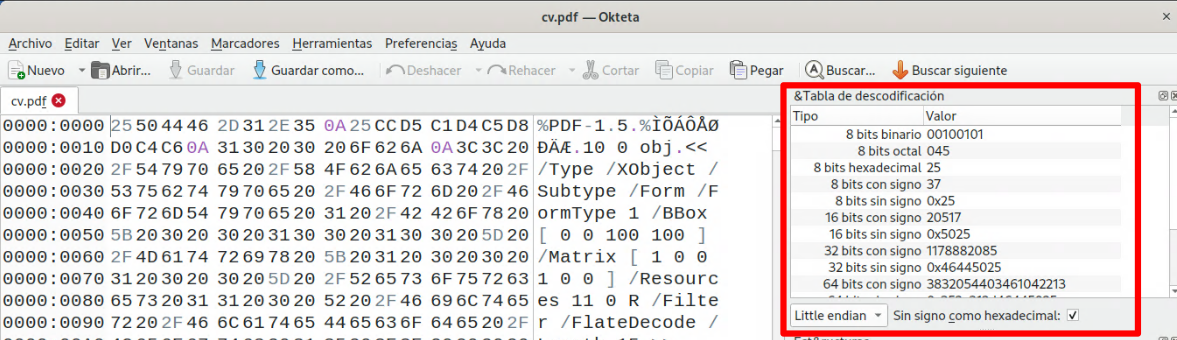

Por ejemplo, podríamos ver cuál es el valor numérico que representaría dicho byte si se considerara como un entero de 8 bits con signo. En el caso de que el fichero contenga, por ejemplo, un valor numérico representado en coma flotante de simple precisión, okteta interpreta tanto el byte actual como los tres siguientes como una codificación IEEE-754 y nos indica el número que está representado.



Para casos en los que es necesario más de un byte para representar la información, es importante recalcar que hay dos formas distintas de almacenar la información. El esquema de almacenamiento *big endian* almacena el byte más significativo al principio, mientras que el esquema *little endian* almacena el byte menos significativo al principio. Es importante saber con qué formato se han almacenado los datos para que okteta pueda decodificarlos correctamente.

Por último, cabe mencionar que resulta posible cambiar la base en la que se muestra el panel del contenido plano, siendo posible elegir entre hexadecimal, decimal, octal o binario. Igualmente, es posible seleccionar la codificación de caracteres que se utiliza para interpretar el contenido plano en el panel de caracteres:

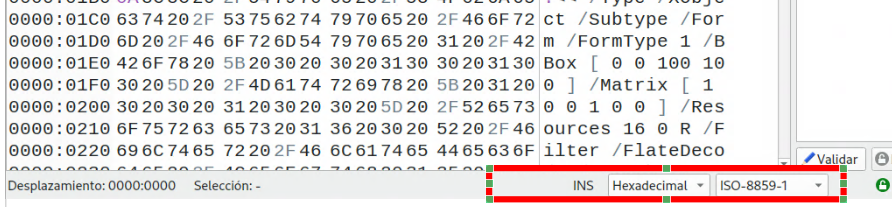

## Ejemplo de intepretación de datos con okteta
Vamos a analizar ahora los contenidos concretos de un fichero binario, llamado `salidac.bin` (disponible en el AV) , que almacena distintos tipos de datos. Mediante el seguimiento de este ejemplo se pretende que el alumno se familiarice con el uso de la herramienta y refuerce sus conocimientos en lo que respecta a las distintas formas de codificar la información. El fichero contiene 22 bytes que contienen los siguientes datos:
1. Una cadena de 4 caracteres.
1. Un entero con signo de 16 bits (en complemento a 2)
1. Un entero con signo de 32 bits (en complemento a 2)
1. Un número real en coma flotante de simple precisión (IEEE 754 de 32 bits)
1. Un número real en coma flotante de doble precisión (IEEE 754 de 64 bits)
    

Para decodificar la información almacenada podemos proceder de dos formas. La primera es hacerlo de manera manual, anotando los valores almacenados en las posiciones correspondientes y después decodificando a mano. Para ello siempre es necesario saber cuándo empieza un determinado dato (su posición o desplazamiento dentro del fichero), además del formato de almacenamiento que se está usando (que en este caso es little endian). La segunda forma de hacerlo es más sencilla y consiste en aprovechar algunas de las funcionalidades que nos da okteta. Colocando el cursor sobre el primer byte de cada dato, podemos buscar en la tabla de decodificación cuál sería el valor correspondiente a dicho dato una vez decodificado. Procedamos de esta segunda manera para ir interpretando todos los datos
almacenados:
1. Para conocer cuáles son los 4 primeros caracteres, nos basta con mirar al principio de la segunda columna, la que se encarga de interpretar la información binaria como si se tratara de caracteres. En ella podemos contemplar que esos cuatro bytes (48 6F 6C 61) codifican "Hola".

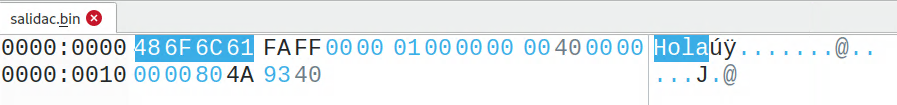

2. Para saber cuál es el valor del entero con signo de 16 bits hay que situar el cursor sobre el quinto byte (Offset = 4), dado que es el primero de los dos que se utilizan para almacenar el valor (FA FF). Al hacerlo comprobaremoscómo en la tabla de decodificación se nos muestra que el valor correspondiente es -6:

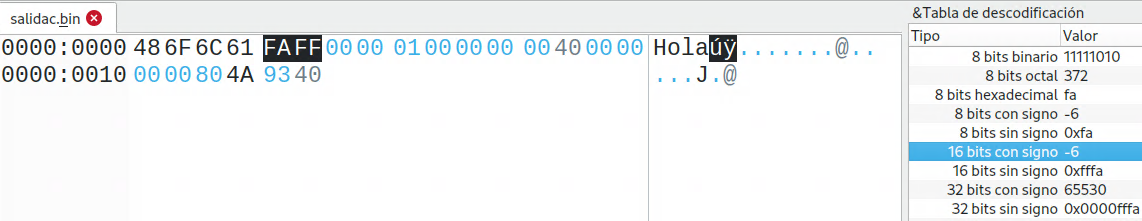

3. Procederemos de forma similar para interpretar el entero con signo de 32 bits. Para ello habrá que colocar el cursor sobre el séptimo byte (Offset = 6), puesto que es el primero de los cuatro que almacenan el valor (00 00 01 00). Al hacerlo observaremos que en la tabla de decodificación se nos indica que al interpretarlo como un entero con signo de 32 bits su valor es 65536.

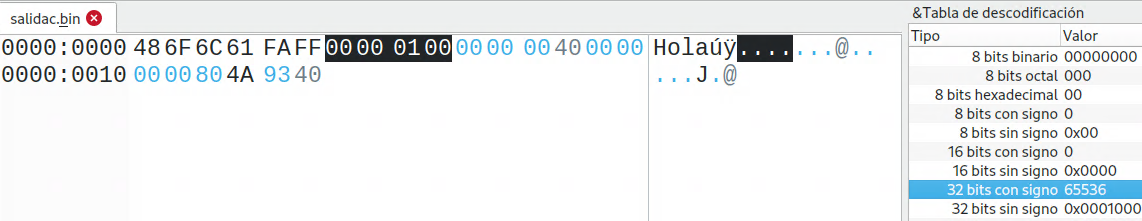

4. El valor real codificado mediante IEEE 754 de simple precisión se decodifica siguiendo el mismo procedimiento, colocando esta vez el cursor en la posición 0A. Vemos que al decodificar el valor de 4 bytes 00 00 00 40 (en little endian), el número en punto flotante que obtenemos es el 2.

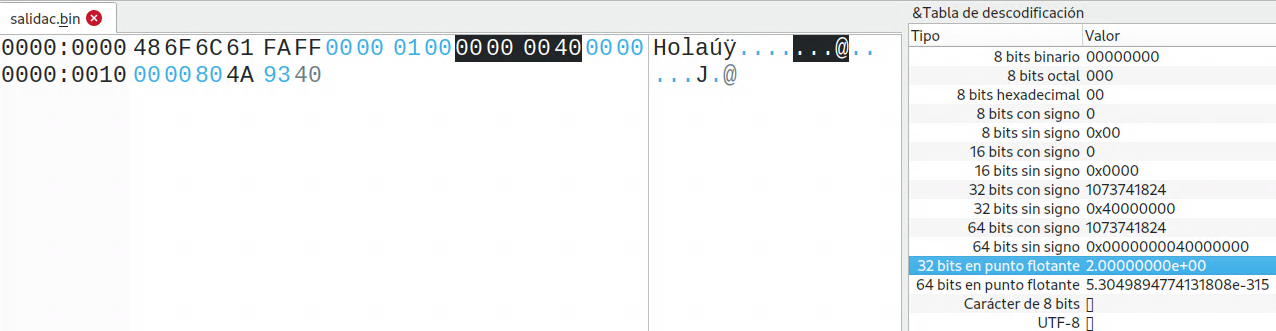


5. Por último, el valor real codificado mediante IEEE 754 de doble precisión se decodifica colocando el cursor en la posición 0E, de forma que vemos que el valor de 8 bytes 00 00 00 00 80 4A 93 40, almacenado en *little endian*, codifica el número 1234,625 como un número en punto flotante de 64 bits.

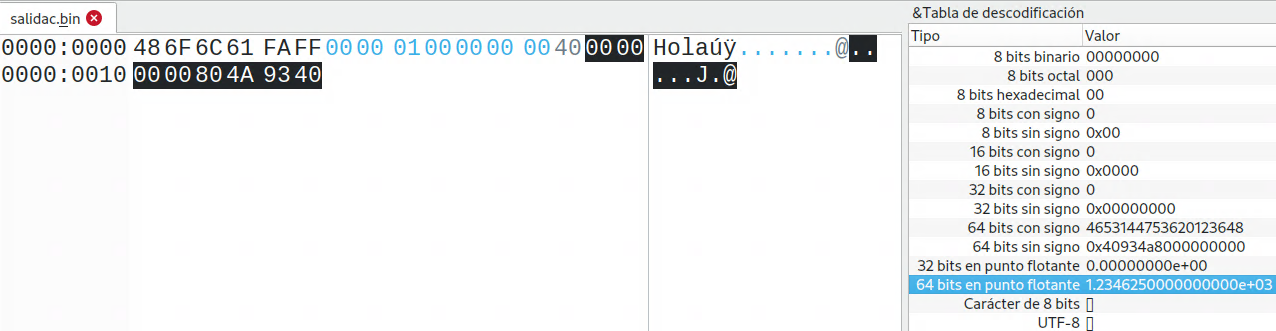

**EJERCICIO**

* **Interpretar el contenido** del fichero `datos.bin` (disponible en el AV) con la herramienta okteta. Dicho fichero contiene, por este orden,los siguientes datos:

1. una cadena de seis caracteres
2. un número real representado mediante IEEE 754 de doble precisión
3. un entero con signo de 32 bits
4. un número real representado mediante IEEE 754 de simple precisión
5. un entero con signo de 16 bits

Para cada uno de los datos anteriores, en las siguientes celdas debes indicar el desplazamiento donde comienza y acaba el dato (ambos inclusive, en hexadecimal), los bytes que codifican el dato en el fichero, la ristra de bits una vez los bytes están en el orden correcto, y finalmente el valor (información) codificada:

1. **Cadena de caracteres**:

- Desplazamiento inicial:

RESPUESTA:

- Desplazamiento final:

RESPUESTA:

- Codificación en el fichero:


RESPUESTA:

- Ristra de bits:

RESPUESTA:

- Información representada (valor codificado):

RESPUESTA:

2. **Número real en doble precisión (*double*)**:

- Desplazamiento inicial:

RESPUESTA:

- Desplazamiento final:

RESPUESTA:

- Codificación en el fichero:


RESPUESTA:

- Ristra de bits:

RESPUESTA:

- Información representada (valor codificado):

RESPUESTA:

3. **Número entero con signo de 32 bits (*int*)**:

- Desplazamiento inicial:

RESPUESTA:

- Desplazamiento final:

RESPUESTA:

- Codificación en el fichero:


RESPUESTA:

- Ristra de bits:

RESPUESTA:

- Información representada (valor codificado):

RESPUESTA:

4. **Número real de simple precisión (*float*)**:

- Desplazamiento inicial:

RESPUESTA:

- Desplazamiento final:

RESPUESTA:

- Codificación en el fichero:


RESPUESTA:

- Ristra de bits:

RESPUESTA:

- Información representada (valor codificado):

RESPUESTA:

5. **Número entero con signo de 16 bits (*short int*)**:

- Desplazamiento inicial:

RESPUESTA:

- Desplazamiento final:

RESPUESTA:

- Codificación en el fichero:


RESPUESTA:

- Ristra de bits:

RESPUESTA:

- Información representada (valor codificado):

RESPUESTA:

**EJERCICIO**

* **Modificar el contenido** del fichero anterior de manera que ahora se almacenen los siguientes valores mediante las codificaciones correspondientes:
1. una cadena de seis caracteres que representen la palabra "PRUEBA"
2. un número real representado mediante IEEE 754 de doble precisión, con valor 8.75
3. un entero con signo de 32 bits, con valor -140506
4. un número real representado mediante IEEE 754 de simple precisión, con valor 5
5. un entero con signo de 16 bits, con valor 36

Para cada uno de los datos anteriores, en las siguientes celdas debes indicar los bytes que codificarían los valores indicados en el fichero, en hexadecimal y en el orden adecuado según el esquema de almacenamiento *little endian*:

1. **Cadena de caracteres**:

- Codificación en el fichero:


RESPUESTA:

2. **Número real en doble precisión (*double*)**:

- Codificación en el fichero:


RESPUESTA:

3. **Número entero con signo de 32 bits (*int*)**:

- Codificación en el fichero:


RESPUESTA:

4. **Número real de simple precisión (*float*)**:

- Codificación en el fichero:


RESPUESTA:

5. **Número entero con signo de 16 bits (*short int*)**:

- Codificación en el fichero:


RESPUESTA:

## Representación de caracteres: codificaciones

In [ ]:
rm -rf ~/p3-boletin && mkdir ~/p3-boletin && cd ~/p3-boletin

In [ ]:
# Ejecuta esta celda para crear un fichero llamado `cualquiera`
echo "Un fichero cualquiera sin tildes ni caracteres especiales" > cualquiera

In [ ]:
# Muestra su contenido
cat cualquiera

El comando `file` se utiliza para determinar el tipo de un fichero (binario, texto, etc.)

In [ ]:
# Muestra el tipo de fichero que es "cualquiera"
file cualquiera

Como ves, la *extensión* del fichero es simplemente una convención de nomenclatura, pero **lo que determina el tipo de un fichero es su contenido, no su nombre**.

In [ ]:
# hexdump es como okteta: Muestra el contenido del fichero en binario
hexdump -C cualquiera

Fíjate en el rango del valores que toma cada uno de los bytes: ningún byte tiene un valor mayor que 7F = 0111 1111 = 2^7-1. Eso se debe a que el código ASCII es un código de 7 bits [0,127]. con lo que en cada celda de memoria (1 byte = 8 bits) donde hay carácter ASCII hay un bit *sobrante* que siempre vale cero (el más significativo).

In [ ]:
# Ejecuta esta celda para crear un fichero llamado `cualquiera`
echo -n "En La Liga juega el Real Madrid" > laliga

In [ ]:
# Muestra su contenido
cat laliga

- El comando `wc FICHERO` ("wc" viene de *word count*) se puede utilizar para mostrar cuántas líneas, palabras, caracteres, etc. contiene un determinado fichero. Consulta la ayuda de dicho comando con `wc --help` para averiguar la opción adecuada que hay que pasar a `wc` para contar caracteres.

In [ ]:
# Muestra la ayuda de wc
wc --help                   #@solution@

In [ ]:
# Cuenta los caracteres del fichero
wc -m laliga

In [ ]:
# Listado largo para ver su tamaño
ls -l laliga

In [ ]:
# Muestra el tipo de fichero que es "cualquiera"
file laliga

Observa los comandos anteriores. El número de caracteres del fichero "laliga" mostrado por `wc` coincide con su tamaño (mostrado por `ls`), y tal como indica el comando `file`, la codificación es ASCII.

Sin embargo, si ahora añadimos el siguiente texto y repetimos, veremos un resultado diferente:

In [ ]:
# Añadimos texto al final, con caracteres especiales
echo " y también el Barça" >> laliga

In [ ]:
cat laliga

In [ ]:
file laliga

In [ ]:
wc -m laliga

In [ ]:
ls -l laliga

Como ves, ahora hay 51 caracteres, que ocupan 53 bytes. La codificación del fichero ha pasado a ser UTF-8. Esto no significa que se hayan recodificado todos los caracteres ASCII que había, puesto que su codificación en UTF8 es idéntica al ASCII. Simplemente, se han añadido caracteres que no pertenecen al código ASCII (é y + ç), y para codificarlos se ha usado UTF-8. Los caracteres de idiomas europeos que no están en el inglés (tildes, etc.) se codifican en UTF-8 usando 2 bytes en vez de uno.

In [ ]:
# hexdump es como okteta: Muestra el contenido del fichero en binario
hexdump -C laliga

Por último, vamos a cambiar la codificación de los caracteres al estándar ISO-8859-15 (Europa Occidental), que se usaba en Europa antes de la expansión global de Internet y con ello del código UNICODE (UTF-8).

In [ ]:
# Esta celda emula el cambio de codificación sin abrir el editor de texto
iconv --from-code=UTF-8 --to-code=ISO-8859-15 laliga > laliga-latin9

In [ ]:
cat laliga-latin9

In [ ]:
ls -l laliga-latin9

In [ ]:
hexdump -C laliga-latin9

Observa en cuántos bytes se codifica el caractér 'é' y 'ç' en Latin9. Ahora, el fichero ocupa 51 bytes, coincidente con el número de caracteres, puesto que la codificación Latin9 es de 8 bits: Todos los caracteres, incluyendo la 'é' y 'ç', se codifican en un byte. Si te fijas, verás que los caracteres especiales de los idiomas europeos se codifican en valores superiores a 7F: e9 (é) y e7 (ç).

### Comprendiendo el porqué de los *mojibakes* 

[*Mojibake* en la Wikipedia](https://en.wikipedia.org/wiki/Mojibake).

In [ ]:
# Ejecuta esta celda para crear un fichero con texto en coreano
echo "축구          significa fútbol en idioma coreano" > chukgu

In [ ]:
hexdump -C chukgu

Si nos fijamos en la codificación del fichero, y sabiendo que el carácter espacio se codifica en ASCII con el valor 20 hexadecimal (32 decimal), veremos que los dos símbolos coreanos ocupan los primeros 6 bytes del fichero.

In [ ]:
cat chukgu

Si tratamos de cambiar la codificación, obtendremos un error, puesto que no es posible codificar los símbolos coreanos en Latin9.

In [ ]:
# Comenta la línea errónea tras ejecutarla.
#iconv --from-code=UTF-8 --to-code=ISO-8859-15 chukgu > chukgu-latin

El siguiente comando ejecuta `cat` del fichero anterior, pero fuerza al terminal a usar Latin9 como codificación de caracteres, en vez de la configuración del sistema (UTF-8). Así pues, los bytes en el fichero que representan caracteres coreanos o europeos especiales en UTF-8 no serán interpretados correctamente, ya que se están interpretando en Latin9. Así, por ejeplo, el primer byte (ec) se interpreta como si codificara una ì con acento grave, cuando en realidad forma parte de la codificación del símbolo 축 (junto con los siguientes dos bytes).

In [ ]:
luit -encoding ISO-8859-15 cat chukgu

A día de hoy, el uso generalizado de la codificación de caracteres UNICODE en la inmensa mayoría de sistemas computacionales ha hecho que los *mojibakes* sean afortunadamente un problema del pasado. Y tú, ¿habías visto alguno antes?

In [ ]:
# Eliminamos los ficheros generados por este cuaderno
rm -rf ~/p3-boletin